# Regularization:
1. Ridge Regression:
   - Shrinks coefficients towards zero but doesn't eliminate them
   - Handles multicollinearity well
   - Good when many features contribute to the prediction

2. Lasso Regression:
   - Can eliminate irrelevant features - sets coefficients to exactly zero
   - Performs automatic feature selection
   - Good when only a few features are truly important

3. Regularization strength α:
   - Higher α = more regularization = simpler models
   - Too high α can lead to underfitting
   - Too low α may not prevent overfitting

We will start by generating synthetic data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n=100

X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

# Adding bias
X_b = np.c_[np.ones((n, 1)), X]

### Defining the loss function

In [10]:
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X @ theta
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)

### Baseline model - No regularization

In [17]:
def linear_regression(X, y, lr=0.1, epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    history = []

    for epoch in range(epochs):
        predictions = X @ theta
        error = predictions - y
        gradient = (2/m) * (X.T @ error)
        theta -= lr * gradient

        loss = compute_mse(X, y, theta)
        history.append(loss)

    return theta, history


### Ridge Regression
The gradient includes both the standard term from Linear Regression and the penalty term

In [18]:
def ridge_regression(X, y, lr=0.1, epochs=50, lambda_=1.0):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    history = []

    for epoch in range(epochs):
        predictions = X @ theta
        error = predictions - y
        gradient = (2/m) * (X.T @ error + lambda_ * theta)
        theta -= lr * gradient

        loss = compute_mse(X, y, theta)
        history.append(loss)

    return theta, history


### Lasso Regression
For Lasso, we don’t have a smooth gradient, so we use the subgradient (the derivative of the absolute value function)

In [19]:
def lasso_regression(X, y, lr=0.1, epochs=50, lambda_=0.1):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    history = []

    for epoch in range(epochs):
        predictions = X @ theta
        error = predictions - y
        # Subgradient: sign function for L1
        subgrad = np.sign(theta)
        gradient = (2/m) * (X.T @ error) + lambda_ * subgrad
        theta -= lr * gradient

        loss = compute_mse(X, y, theta)
        history.append(loss)

    return theta, history


In [20]:
theta_lr, hist_lr = linear_regression(X_b, y)
theta_ridge, hist_ridge = ridge_regression(X_b, y, lambda_=10)
theta_lasso, hist_lasso = lasso_regression(X_b, y, lambda_=0.1)


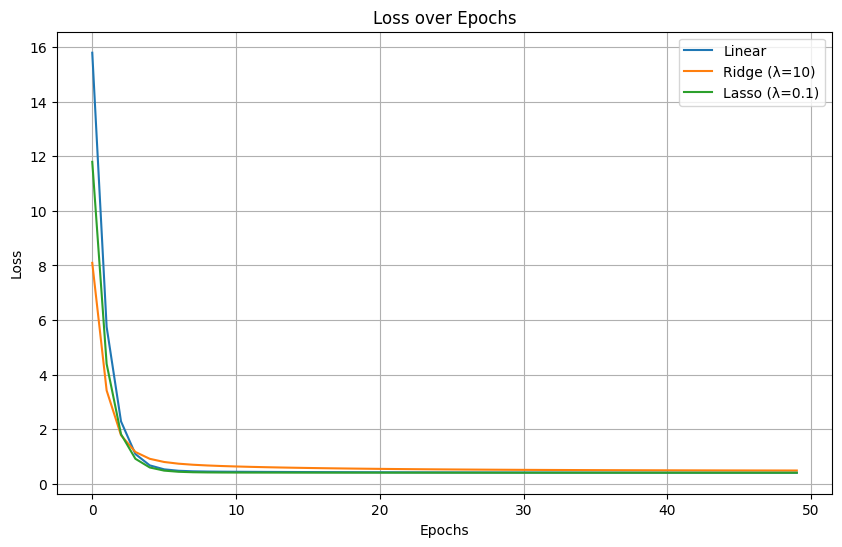

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(hist_lr, label="Linear")
plt.plot(hist_ridge, label="Ridge (λ=10)")
plt.plot(hist_lasso, label="Lasso (λ=0.1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()


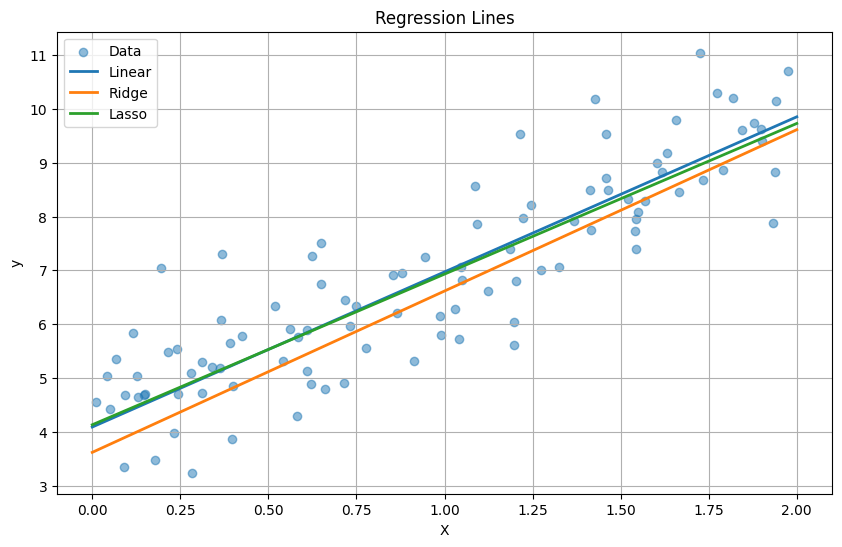

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Data")

x_vals = np.linspace(0, 2, 100)
X_vals_b = np.c_[np.ones((100, 1)), x_vals]

plt.plot(x_vals, X_vals_b @ theta_lr, label="Linear", linewidth=2)
plt.plot(x_vals, X_vals_b @ theta_ridge, label="Ridge", linewidth=2)
plt.plot(x_vals, X_vals_b @ theta_lasso, label="Lasso", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression Lines")
plt.legend()
plt.grid(True)
plt.show()
